In [ ]:
import numpy as np
import os, sys

project_root = os.path.abspath("")  # alternative
if project_root[-12:] == 'LyoSavin2023':
    base_dir = project_root
else:
    base_dir = os.path.dirname(project_root)
sys.path.append(os.path.join(base_dir, 'core'))
sys.path.append(os.path.join(base_dir, 'core/utils'))

import torch
from tqdm.auto import tqdm, trange
import matplotlib.pyplot as plt
import zarr

from utils import remove_all_ticks_and_labels

# beta vs sigma schedule during forward process

torch.Size([100])


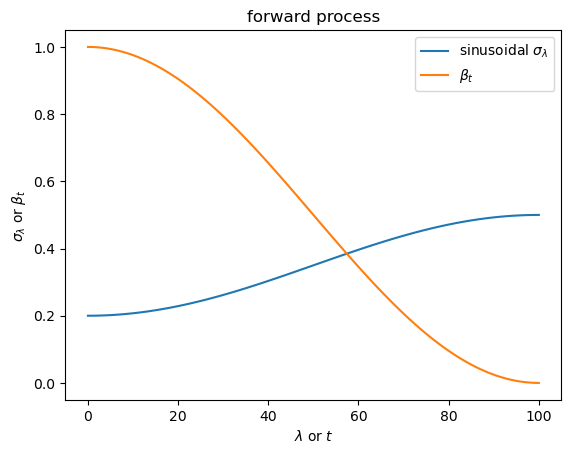

In [ ]:
from utils import make_beta_schedule
# b_max = 1e-2
b_max = 0.5
# b_min = 1e-5
b_min = 0.2

sigma_sine = make_beta_schedule(schedule='sine', n_timesteps=100, start=b_min, end=b_max)
# sigma_sigmoid = make_beta_schedule(schedule='sigmoid', n_timesteps=100, start=b_min, end=b_max)
print(sigma_sine.shape)

ls = np.linspace(0, 100, 100)

fig, ax = plt.subplots(1, 1)
ax.set(xlabel='$\lambda$ or $t$', ylabel='$\sigma_\lambda$ or $\\beta_t$')
# ax.plot(ls, sigma_sigmoid, label='sigmoidal $\sigma_\lambda$')

# beta = (b_max-b_min)/2 * (1 + np.cos(np.pi*ls/100)) + b_min
# beta = b_max - sigma_sine + b_min
# beta = 1/2 * (1 + np.cos(np.pi*ls/100))

sigma_sine = (b_max - b_min)/2 * (1 - np.cos(np.pi*ls/100)) + b_min

beta = 1 - (sigma_sine - b_min) / (b_max-b_min)

ax.plot(ls, sigma_sine, label='sinusoidal $\sigma_\lambda$')
ax.plot(ls, beta, label='$\\beta_t$')
ax.legend()
ax.set(title='forward process')
plt.show()